In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [104]:
d=pd.read_excel('/content/drive/MyDrive/decision tree.xlsx')
d.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,Block,ReusedCount,Longitude,Latitude,Class
0,1,6104.959412,0,1,1,0,0,0,1,0,-80.577366,28.561857,0
1,2,525.000000,0,1,1,0,0,0,1,0,-80.577366,28.561857,0
2,3,677.000000,1,1,1,0,0,0,1,0,-80.577366,28.561857,0
3,4,500.000000,2,2,1,0,0,0,1,0,-120.610829,34.632093,0
4,5,3170.000000,3,1,1,0,0,0,1,0,-80.577366,28.561857,0


In [105]:
x=d.iloc[:,1:4]
y=d.iloc[:,12:13]
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [106]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=15)

In [107]:
print(x_train)

     PayloadMass  Orbit  LaunchSite
86  15400.000000      8           3
13   1898.000000      1           1
16   2034.000000      0           1
18   5271.000000      3           1
30   6070.000000      3           3
..           ...    ...         ...
28   5300.000000      3           3
0    6104.959412      0           1
5    3325.000000      3           1
12    570.000000      4           1
72   6104.959412      9           3

[72 rows x 3 columns]


In [108]:
print(x_test)

     PayloadMass  Orbit  LaunchSite
76  15600.000000      8           3
46   9600.000000      2           2
59   2573.000000      1           1
57   3000.000000      3           3
48    350.000000      6           1
69   5000.000000      1           1
8    4535.000000      3           1
14   4707.000000      3           1
9    4428.000000      3           1
73  15600.000000      8           1
25   9600.000000      2           2
87  15400.000000      8           3
38   9600.000000      2           2
3     500.000000      2           2
20   4696.000000      3           1
45   6092.000000      3           1
43   6104.959412      0           1
52   7076.000000      3           1


In [109]:
print(y_train)
print(y_train.shape)

    Class
86      1
13      0
16      1
18      0
30      0
..    ...
28      1
0       0
5       0
12      1
72      0

[72 rows x 1 columns]
(72, 1)


In [110]:
print(y_test)

    Class
76      0
46      0
59      0
57      1
48      1
69      1
8       0
14      0
9       0
73      1
25      1
87      1
38      1
3       0
20      1
45      0
43      1
52      1


In [111]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score

In [112]:
dt=DecisionTreeRegressor()
cc=dt.fit(x_train,y_train)
from sklearn.metrics import mean_squared_error as MSE
yp=dt.predict(x_test)
mse_dt=MSE(y_test,yp)
rms=mse_dt**(1/2)
print(rms)

0.7817359599705717


[Text(0.734375, 0.9545454545454546, 'X[0] <= 6780.5\nsquared_error = 0.212\nsamples = 72\nvalue = 0.694'),
 Text(0.5758928571428571, 0.8636363636363636, 'X[0] <= 5341.925\nsquared_error = 0.239\nsamples = 53\nvalue = 0.604'),
 Text(0.4017857142857143, 0.7727272727272727, 'X[2] <= 1.5\nsquared_error = 0.214\nsamples = 42\nvalue = 0.69'),
 Text(0.26785714285714285, 0.6818181818181818, 'X[0] <= 2345.5\nsquared_error = 0.245\nsamples = 28\nvalue = 0.571'),
 Text(0.17857142857142858, 0.5909090909090909, 'X[0] <= 547.5\nsquared_error = 0.213\nsamples = 13\nvalue = 0.692'),
 Text(0.14285714285714285, 0.5, 'squared_error = 0.0\nsamples = 1\nvalue = 0.0'),
 Text(0.21428571428571427, 0.5, 'X[0] <= 2221.85\nsquared_error = 0.188\nsamples = 12\nvalue = 0.75'),
 Text(0.17857142857142858, 0.4090909090909091, 'X[0] <= 2210.5\nsquared_error = 0.222\nsamples = 9\nvalue = 0.667'),
 Text(0.14285714285714285, 0.3181818181818182, 'X[0] <= 1937.5\nsquared_error = 0.188\nsamples = 8\nvalue = 0.75'),
 Text(0.

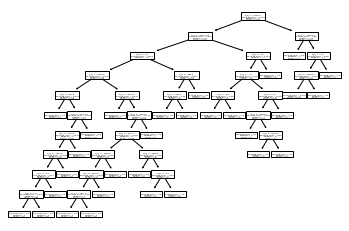

In [113]:
  from sklearn import tree
  tree.plot_tree(cc)

In [89]:
from sklearn.svm import SVR


In [114]:
svm_regression=SVR()
svm_regression.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [115]:
yfit=svm_regression.predict(x)


In [116]:
score=svm_regression.score(x,y)
print(MSE(y,yfit))

0.27589056580525995
